In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score, f1_score, classification_report

In [42]:
# Load the dataset
data = pd.read_csv("Telco-Customer-Churn.csv")

In [43]:
# Drop irrelevant columns
if 'customerID' in data.columns:
    data = data.drop(columns=['customerID'])

In [44]:
# Data Cleaning
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['tenure'] = pd.to_numeric(data['tenure'], errors='coerce')
data['TotalCharges'] = data['TotalCharges'].fillna(data['TotalCharges'].median())
data['tenure'] = data['tenure'].fillna(data['tenure'].median())
data['Churn'] = data['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

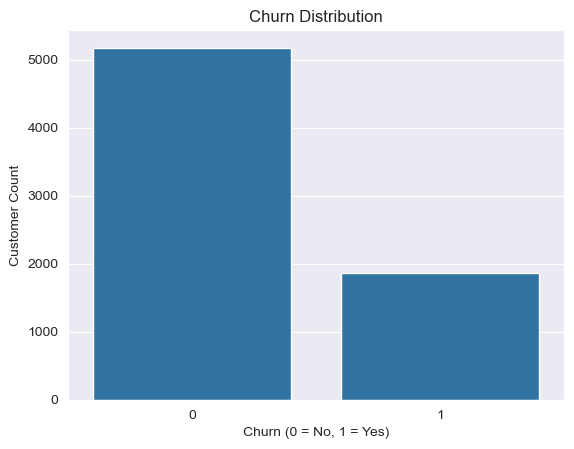

In [45]:
# Visualization 1: Churn Distribution
sns.countplot(x='Churn', data=data)
plt.title("Churn Distribution")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Customer Count")
plt.show()

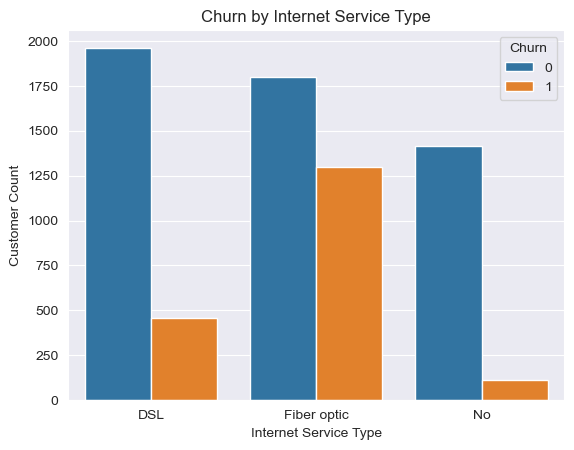

In [46]:
# Visualization 2: Churn by Internet Service
sns.countplot(x='InternetService', hue='Churn', data=data)
plt.title("Churn by Internet Service Type")
plt.xlabel("Internet Service Type")
plt.ylabel("Customer Count")
plt.show()

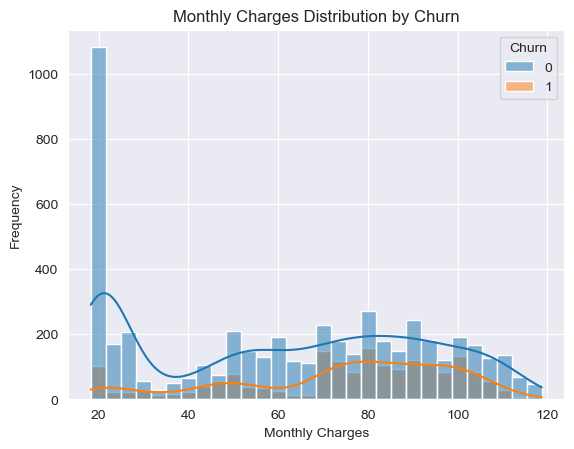

In [47]:
# Visualization 3: Monthly Charges Distribution by Churn
sns.histplot(data, x='MonthlyCharges', hue='Churn', kde=True, bins=30)
plt.title("Monthly Charges Distribution by Churn")
plt.xlabel("Monthly Charges")
plt.ylabel("Frequency")
plt.show()

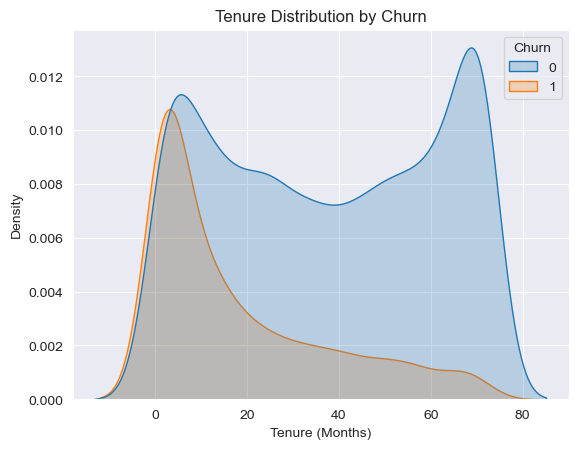

In [48]:
# Visualization 4: Tenure Distribution by Churn
sns.kdeplot(data=data, x='tenure', hue='Churn', fill=True)
plt.title("Tenure Distribution by Churn")
plt.xlabel("Tenure (Months)")
plt.ylabel("Density")
plt.show()

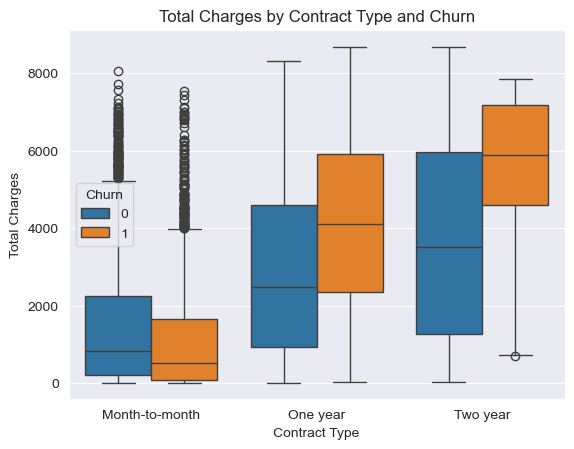

In [49]:
# Visualization 5: Boxplot of Total Charges by Contract Type
sns.boxplot(x='Contract', y='TotalCharges', hue='Churn', data=data)
plt.title("Total Charges by Contract Type and Churn")
plt.xlabel("Contract Type")
plt.ylabel("Total Charges")
plt.show()

In [50]:
# One-hot encode categorical variables
categorical_columns = data.select_dtypes(include=['object']).columns
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

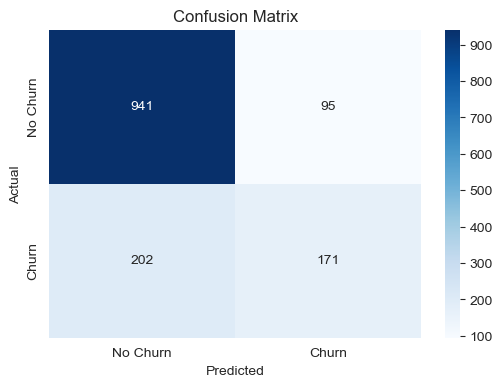

In [51]:
# Define features (X) and target (y)
X = data.drop(columns=['Churn'])
y = data['Churn']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Generate predictions and probabilities
y_pred = rf_model.predict(X_test)
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Churn", "Churn"],
            yticklabels=["No Churn", "Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()



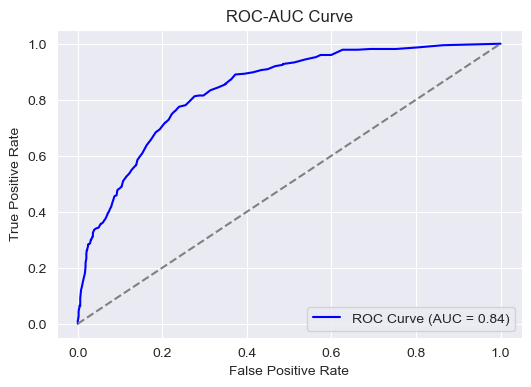

In [52]:
# ROC-AUC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color="blue", label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC Curve")
plt.legend(loc="lower right")
plt.show()

In [53]:
# Evaluate Random Forest Model Performance

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.2f}")
print(f"F1-Score: {f1:.2f}")

# Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Model Accuracy: 0.79
F1-Score: 0.54

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.91      0.86      1036
           1       0.64      0.46      0.54       373

    accuracy                           0.79      1409
   macro avg       0.73      0.68      0.70      1409
weighted avg       0.78      0.79      0.78      1409

